# TITLE: ADVANCED MODEL TO DIAGNOSE DISEASE AND PRESCRIBE BASED ON USER INPUTS

## DATASET LOADING

In [19]:
import pandas as pd

In [20]:
df = pd.read_csv("../dataset/Training.csv")

In [21]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


## DATASET SPLITTING

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [24]:
X = df.drop('prognosis', axis=1)
y = df['prognosis']

In [25]:
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

## TRAINING MODELS

In [27]:
import numpy as np
import shap
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

#### Storing models in a dictionary

In [28]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100,random_state=42),
    "SVM": SVC(kernel='linear',random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": MultinomialNB()
}

results = {}

#### Training Loop

Training Logistic Regression...
Logistic Regression - Accuracy: 1.0000, F1 Score: 1.0000

Logistic Regression - Confusion Matrix:
[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]



<Figure size 1000x600 with 0 Axes>

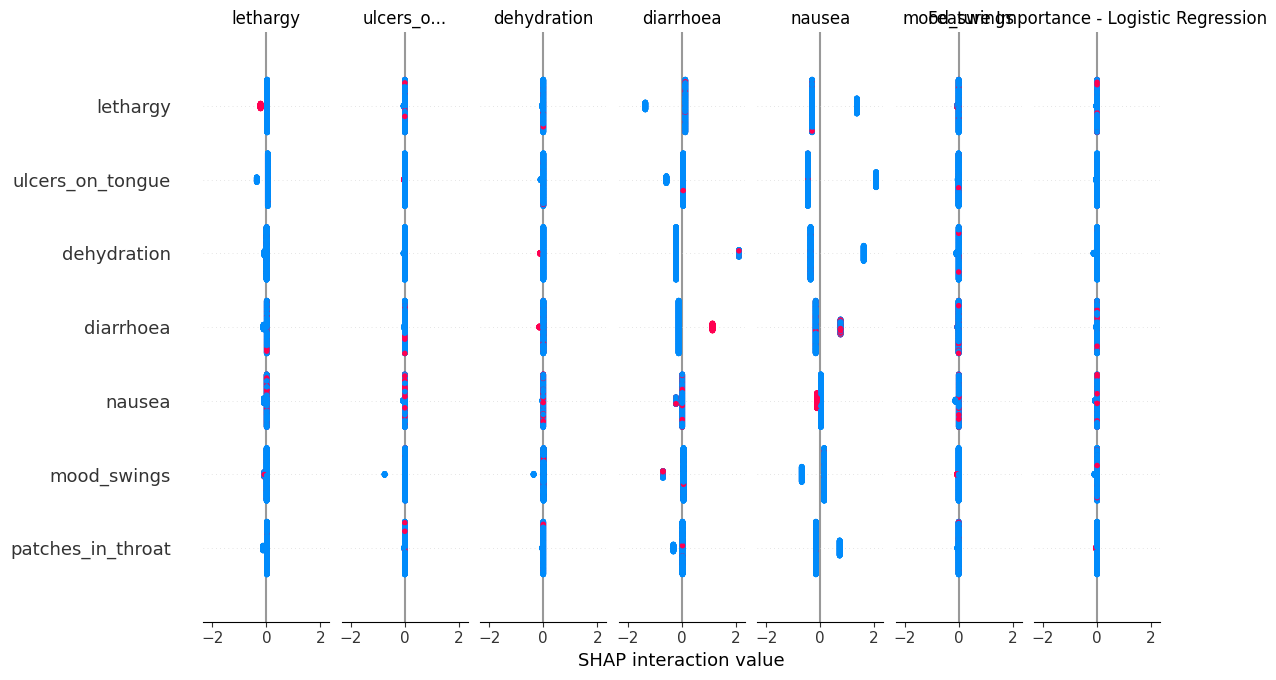

Training Random Forest...
Random Forest - Accuracy: 1.0000, F1 Score: 1.0000

Random Forest - Confusion Matrix:
[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]



100%|===================| 40324/40344 [16:04<00:00]        

<Figure size 1000x600 with 0 Axes>

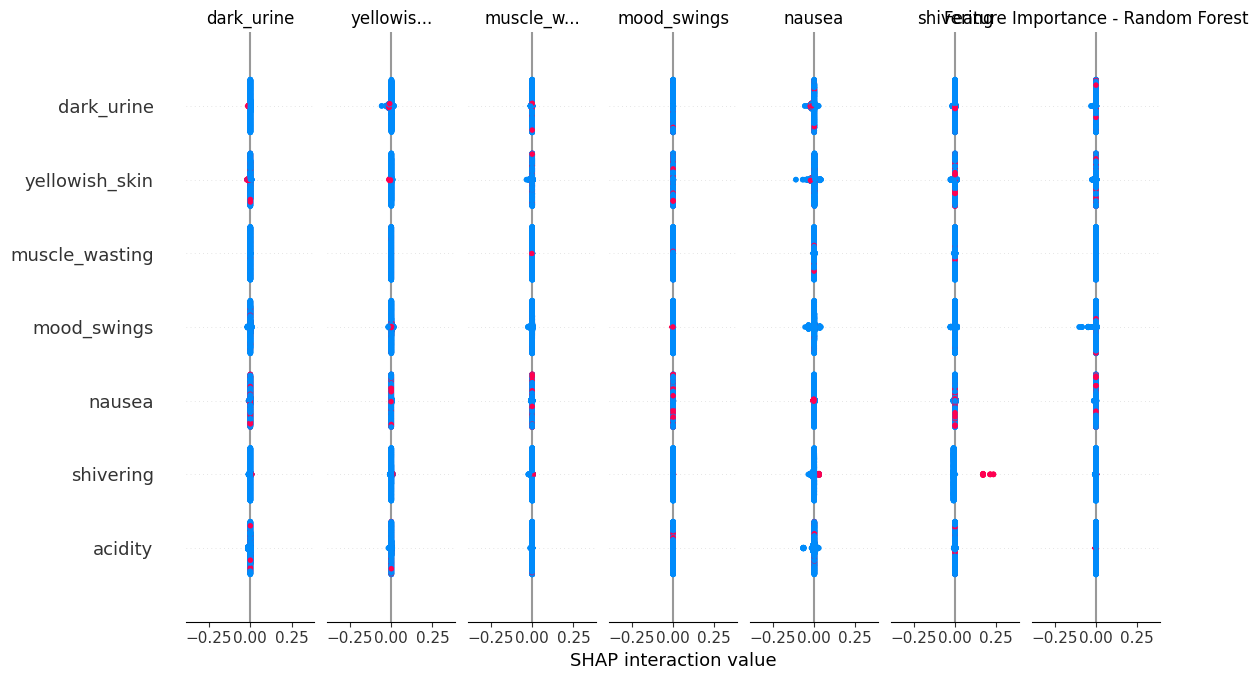

Training SVM...
SVM - Accuracy: 1.0000, F1 Score: 1.0000

SVM - Confusion Matrix:
[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]

Training KNN...
KNN - Accuracy: 1.0000, F1 Score: 1.0000

KNN - Confusion Matrix:
[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]

Training Naive Bayes...
Naive Bayes - Accuracy: 1.0000, F1 Score: 1.0000

Naive Bayes - Confusion Matrix:
[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]



In [29]:
import matplotlib.pyplot as plt

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    matrix = confusion_matrix(y_test, y_pred)
    
    print(f"{model_name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}\n")
    print(f"{model_name} - Confusion Matrix:\n{matrix}\n")
    
    results[model_name] = {"accuracy": accuracy, "f1": f1, "confusion_matrix": matrix}

    # SHAP Explainability
    if model_name in ["Logistic Regression", "Random Forest"]:
        explainer = shap.Explainer(model, X_train)
        shap_values = explainer(X_test)
    
        # Ensure feature names are properly indexed
        if isinstance(X_test, pd.DataFrame):  
            feature_names = np.array(X_test.columns)  # Convert to NumPy array
        else:
            feature_names = np.array([f"Feature {i}" for i in range(X_test.shape[1])])
    
        # Summary plot of feature importance
        plt.figure(figsize=(10,6))
        shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False)  # No .tolist()
        plt.title(f"Feature Importance - {model_name}")
        plt.show()



#### Results Vizualization

C:\Users\user\AppData\Local\Temp\ipykernel_9236\2580548398.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


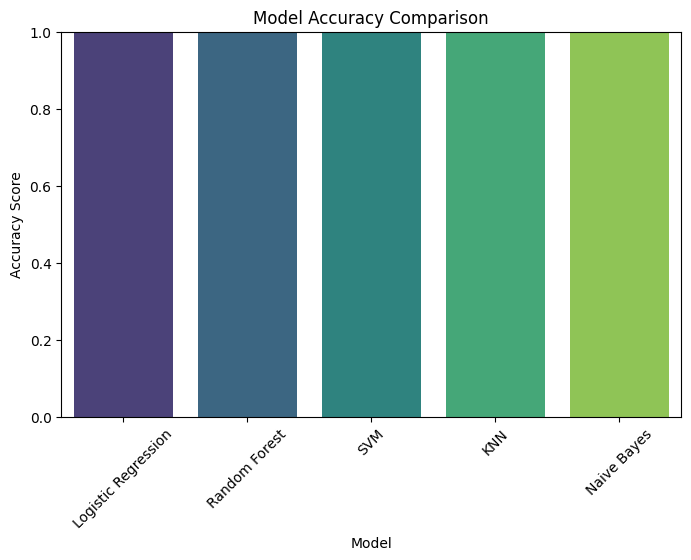

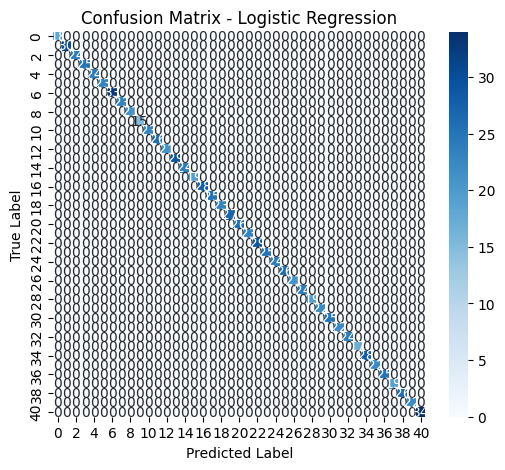

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization - Accuracy Comparison
model_names = list(results.keys())
accuracies = [results[m]["accuracy"] for m in model_names]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Visualization - Confusion Matrix for Best Model
best_model = max(results, key=lambda m: results[m]["accuracy"])
best_matrix = results[best_model]["confusion_matrix"]

plt.figure(figsize=(6, 5))
sns.heatmap(best_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix - {best_model}")
plt.show()

#### Results Comparison

In [32]:
results_df = pd.DataFrame(results).T
print("Model Comparison Results:")
print(results_df)

Model Comparison Results:
                    accuracy   f1  \
Logistic Regression      1.0  1.0   
Random Forest            1.0  1.0   
SVM                      1.0  1.0   
KNN                      1.0  1.0   
Naive Bayes              1.0  1.0   

                                                      confusion_matrix  
Logistic Regression  [[18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...  
Random Forest        [[18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...  
SVM                  [[18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...  
KNN                  [[18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...  
Naive Bayes          [[18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...  


## TRAINING A SINGLE MODEL

In [33]:
Random_Forest = RandomForestClassifier(n_estimators=100,random_state=42)
Random_Forest.fit(X_train,y_train)
ypred = Random_Forest.predict(X_test)
accuracy_score(y_test,ypred)

1.0

#### Saving Model

In [34]:
import pickle
pickle.dump(Random_Forest,open('Random_Forest.pkl','wb'))

#### Loading The Model

In [35]:
Random_Forest = pickle.load(open('Random_Forest.pkl','rb'))

## PRESCRIBING SYSTEM
#### Loading datasets

In [36]:
description_df = pd.read_csv("../dataset/description.csv")
symptoms_df = pd.read_csv("../dataset/symptoms_df.csv")
Symptom_severity_df = pd.read_csv("../dataset/Symptom-severity.csv")
precautions_df = pd.read_csv("../dataset/precautions_df.csv")
medications_df = pd.read_csv("../dataset/medications.csv")
workout_df = pd.read_csv("../dataset/workout_df.csv")
diets = pd.read_csv("../dataset/diets.csv")

#### Mapping

In [37]:

prognosis_mapping = {index: disease for index, disease in enumerate(le.classes_)}

print(prognosis_mapping)


{0: '(vertigo) Paroymsal  Positional Vertigo', 1: 'AIDS', 2: 'Acne', 3: 'Alcoholic hepatitis', 4: 'Allergy', 5: 'Arthritis', 6: 'Bronchial Asthma', 7: 'Cervical spondylosis', 8: 'Chicken pox', 9: 'Chronic cholestasis', 10: 'Common Cold', 11: 'Dengue', 12: 'Diabetes ', 13: 'Dimorphic hemmorhoids(piles)', 14: 'Drug Reaction', 15: 'Fungal infection', 16: 'GERD', 17: 'Gastroenteritis', 18: 'Heart attack', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 23: 'Hypertension ', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 26: 'Hypothyroidism', 27: 'Impetigo', 28: 'Jaundice', 29: 'Malaria', 30: 'Migraine', 31: 'Osteoarthristis', 32: 'Paralysis (brain hemorrhage)', 33: 'Peptic ulcer diseae', 34: 'Pneumonia', 35: 'Psoriasis', 36: 'Tuberculosis', 37: 'Typhoid', 38: 'Urinary tract infection', 39: 'Varicose veins', 40: 'hepatitis A'}


In [38]:

symptom_mapping = {index: symptom for index, symptom in enumerate(X.columns)}

print(symptom_mapping)


{0: 'itching', 1: 'skin_rash', 2: 'nodal_skin_eruptions', 3: 'continuous_sneezing', 4: 'shivering', 5: 'chills', 6: 'joint_pain', 7: 'stomach_pain', 8: 'acidity', 9: 'ulcers_on_tongue', 10: 'muscle_wasting', 11: 'vomiting', 12: 'burning_micturition', 13: 'spotting_ urination', 14: 'fatigue', 15: 'weight_gain', 16: 'anxiety', 17: 'cold_hands_and_feets', 18: 'mood_swings', 19: 'weight_loss', 20: 'restlessness', 21: 'lethargy', 22: 'patches_in_throat', 23: 'irregular_sugar_level', 24: 'cough', 25: 'high_fever', 26: 'sunken_eyes', 27: 'breathlessness', 28: 'sweating', 29: 'dehydration', 30: 'indigestion', 31: 'headache', 32: 'yellowish_skin', 33: 'dark_urine', 34: 'nausea', 35: 'loss_of_appetite', 36: 'pain_behind_the_eyes', 37: 'back_pain', 38: 'constipation', 39: 'abdominal_pain', 40: 'diarrhoea', 41: 'mild_fever', 42: 'yellow_urine', 43: 'yellowing_of_eyes', 44: 'acute_liver_failure', 45: 'fluid_overload', 46: 'swelling_of_stomach', 47: 'swelled_lymph_nodes', 48: 'malaise', 49: 'blurred

#### Predicting Function

In [39]:
import numpy as np

def helper(disease_name):
    # Get disease description
    desc = description_df.loc[description_df['Disease'] == disease_name, 'Description']
    desc = " ".join([w for w in desc])

    # Get precautions
    pre = precautions_df.loc[precautions_df['Disease'] == disease_name, ['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    # Get medications
    med = medications_df.loc[medications_df['Disease'] == disease_name, 'Medication']
    med = [med for med in med.values]

    # Get diet recommendations
    die = diets.loc[diets['Disease'] == disease_name, 'Diet']
    die = [die for die in die.values]

    # Get workouts
    wrkout = workout_df.loc[workout_df['disease'] == disease_name, 'workout']
    wrkout = wrkout.tolist() if not wrkout.empty else ["No workout suggestions available"]

    return desc,pre,med,die,wrkout

# Inverted symptoms dictionary for correct lookup
symptoms_dict = {0: 'itching', 1: 'skin_rash', 2: 'nodal_skin_eruptions', 3: 'continuous_sneezing', 4: 'shivering', 5: 'chills', 6: 'joint_pain', 7: 'stomach_pain', 8: 'acidity', 9: 'ulcers_on_tongue', 10: 'muscle_wasting', 11: 'vomiting', 12: 'burning_micturition', 13: 'spotting_ urination', 14: 'fatigue', 15: 'weight_gain', 16: 'anxiety', 17: 'cold_hands_and_feets', 18: 'mood_swings', 19: 'weight_loss', 20: 'restlessness', 21: 'lethargy', 22: 'patches_in_throat', 23: 'irregular_sugar_level', 24: 'cough', 25: 'high_fever', 26: 'sunken_eyes', 27: 'breathlessness', 28: 'sweating', 29: 'dehydration', 30: 'indigestion', 31: 'headache', 32: 'yellowish_skin', 33: 'dark_urine', 34: 'nausea', 35: 'loss_of_appetite', 36: 'pain_behind_the_eyes', 37: 'back_pain', 38: 'constipation', 39: 'abdominal_pain', 40: 'diarrhoea', 41: 'mild_fever', 42: 'yellow_urine', 43: 'yellowing_of_eyes', 44: 'acute_liver_failure', 45: 'fluid_overload', 46: 'swelling_of_stomach', 47: 'swelled_lymph_nodes', 48: 'malaise', 49: 'blurred_and_distorted_vision', 50: 'phlegm', 51: 'throat_irritation', 52: 'redness_of_eyes', 53: 'sinus_pressure', 54: 'runny_nose', 55: 'congestion', 56: 'chest_pain', 57: 'weakness_in_limbs', 58: 'fast_heart_rate', 59: 'pain_during_bowel_movements', 60: 'pain_in_anal_region', 61: 'bloody_stool', 62: 'irritation_in_anus', 63: 'neck_pain', 64: 'dizziness', 65: 'cramps', 66: 'bruising', 67: 'obesity', 68: 'swollen_legs', 69: 'swollen_blood_vessels', 70: 'puffy_face_and_eyes', 71: 'enlarged_thyroid', 72: 'brittle_nails', 73: 'swollen_extremeties', 74: 'excessive_hunger', 75: 'extra_marital_contacts', 76: 'drying_and_tingling_lips', 77: 'slurred_speech', 78: 'knee_pain', 79: 'hip_joint_pain', 80: 'muscle_weakness', 81: 'stiff_neck', 82: 'swelling_joints', 83: 'movement_stiffness', 84: 'spinning_movements', 85: 'loss_of_balance', 86: 'unsteadiness', 87: 'weakness_of_one_body_side', 88: 'loss_of_smell', 89: 'bladder_discomfort', 90: 'foul_smell_of urine', 91: 'continuous_feel_of_urine', 92: 'passage_of_gases', 93: 'internal_itching', 94: 'toxic_look_(typhos)', 95: 'depression', 96: 'irritability', 97: 'muscle_pain', 98: 'altered_sensorium', 99: 'red_spots_over_body', 100: 'belly_pain', 101: 'abnormal_menstruation', 102: 'dischromic _patches', 103: 'watering_from_eyes', 104: 'increased_appetite', 105: 'polyuria', 106: 'family_history', 107: 'mucoid_sputum', 108: 'rusty_sputum', 109: 'lack_of_concentration', 110: 'visual_disturbances', 111: 'receiving_blood_transfusion', 112: 'receiving_unsterile_injections', 113: 'coma', 114: 'stomach_bleeding', 115: 'distention_of_abdomen', 116: 'history_of_alcohol_consumption', 117: 'fluid_overload.1', 118: 'blood_in_sputum', 119: 'prominent_veins_on_calf', 120: 'palpitations', 121: 'painful_walking', 122: 'pus_filled_pimples', 123: 'blackheads', 124: 'scurring', 125: 'skin_peeling', 126: 'silver_like_dusting', 127: 'small_dents_in_nails', 128: 'inflammatory_nails', 129: 'blister', 130: 'red_sore_around_nose', 131: 'yellow_crust_ooze'}
disease_list = {0: '(vertigo) Paroymsal  Positional Vertigo', 1: 'AIDS', 2: 'Acne', 3: 'Alcoholic hepatitis', 4: 'Allergy', 5: 'Arthritis', 6: 'Bronchial Asthma', 7: 'Cervical spondylosis', 8: 'Chicken pox', 9: 'Chronic cholestasis', 10: 'Common Cold', 11: 'Dengue', 12: 'Diabetes ', 13: 'Dimorphic hemmorhoids(piles)', 14: 'Drug Reaction', 15: 'Fungal infection', 16: 'GERD', 17: 'Gastroenteritis', 18: 'Heart attack', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 23: 'Hypertension ', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 26: 'Hypothyroidism', 27: 'Impetigo', 28: 'Jaundice', 29: 'Malaria', 30: 'Migraine', 31: 'Osteoarthristis', 32: 'Paralysis (brain hemorrhage)', 33: 'Peptic ulcer diseae', 34: 'Pneumonia', 35: 'Psoriasis', 36: 'Tuberculosis', 37: 'Typhoid', 38: 'Urinary tract infection', 39: 'Varicose veins', 40: 'hepatitis A'}

def get_predicted_value(patient_symptoms, model):
    input_vector = np.zeros(len(symptoms_dict))
    
    for symptom in patient_symptoms:
        if symptom in symptoms_dict:
            input_vector[symptoms_dict[symptom]] = 1
    
    predicted_disease_index = model.predict([input_vector])[0]
    return disease_list.get(predicted_disease_index, "Unknown Disease")


#### Testing

In [ ]:
symptoms = input("Enter your symptoms.......")
patient_symptoms = [s.strip() for s in symptoms.split(',')]
patient_symptoms = [symptom.strip("[]' ") for symptom in patient_symptoms]
predicted_disease = get_predicted_value(patient_symptoms, model)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1